# Simulations on a 1d atom model.

Although very simple, it is able to illustrate many important concepts.


In [1]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.matrix_simulator import MatrixSimulator
from fft_tdse.animator import *
import matplotlib.pyplot as plt

In [2]:
x_min = -400.0
x_max = 400.0
nx = 4096
t_final = 150.0
n_steps = 15000
case = 'weak' # 'weak' or 'strong'

def potential(x):
    V = -0.5 * (x*x + 0.25)**(-.5)
    return V

if case == 'weak':
    laser = LaserPulse(omega=0.25, t0=20.0, T=60.0, E0=0.01)
else:
    laser = LaserPulse(omega=0.25, t0=20.0, T=60.0, E0=0.1)


In [3]:
# Create grid simulator, and prepare for simulation.
sim0 = Simulator(verbose=True)
sim0.set_dimension(1)
sim0.set_potential(potential)
sim0.set_grid(x_min, x_max, nx)
sim0.set_time_parameters(0.0, t_final, n_steps)
sim0.set_laser_pulse(laser)
sim0.ground_state_guess =  np.exp(-sim0.x**2/2)
sim0.prepare()

# Save initial wavefunction from grid simulator.
psi_init = sim0.psi.copy()

# Create matrix simulator, and prepare for simulation.
sim = MatrixSimulator(verbose=True)
sim.set_dimension(1)
sim.set_potential(potential)
sim.set_grid(x_min, x_max, nx)
sim.set_time_parameters(0.0, t_final, n_steps)
sim.set_laser_pulse(laser)

# Set number of eigenstates to use as basis.
sim.compute_eigenstates(n_states=5)
sim.prepare()

# Copy initial wavefunction from grid simulator.
sim.set_psi_vec_from_psi(psi_init)
ic(sim.psi_vec)

ic| message: 'Dimension set to 1'
ic| 'Time grid:'
ic| self.t0: 0.0, self.t1: 150.0, self.n_steps: 15000
ic| hasattr(self, 'gs'): False
ic| 'computing ground state ... '
ic| 'using guess for ground state ... '
ic| hasattr(self, 'gs'): True
ic| message: 'Dimension set to 1'
ic| 'Time grid:'
ic| self.t0: 0.0, self.t1: 150.0, self

Initial guess: resid = 0.21061268336883657, E = -0.4557570515341621
Iteration 0, delta = 0.14048815596265254, resid = 0.07178871799262354, E = -0.49279504591518997
Iteration 1, delta = 0.05854066281449574, resid = 0.029389566501924737, E = -0.49860862131522865
Iteration 2, delta = 0.02602557702964184, resid = 0.013023895503193722, E = -0.4997003450830072
Iteration 3, delta = 0.012146475817314558, resid = 0.0060744156929638865, E = -0.4999307043738355
Iteration 4, delta = 0.0058591564847086195, resid = 0.0029297142768062055, E = -0.4999832210101875
Iteration 5, delta = 0.0028901361303421457, resid = 0.0014450846630903406, E = -0.499995825896088
Iteration 6, delta = 0.0014478875074083717, resid = 0.0007239458370099683, E = -0.4999989596340625
Iteration 7, delta = 0.000733456997614872, resid = 0.0003667287603335765, E = -0.4999997583454453
Iteration 8, delta = 0.00037460409316415565, resid = 0.00018730207808891465, E = -0.4999999656453179
Iteration 9, delta = 0.00019251437130942195, resid

.n_steps: 15000
ic| n: 4096
ic| 'Computing n_states eigenvalues of the Hamiltonian ... '
ic| self.E_vec: array([-0.50000004, -0.10586697, -0.05458326, -0.02882917, -0.01977971])
ic| self.E_vec.shape: (5,), self.U_mat.shape: (4096, 5)
ic| 'orthogonality check:'
ic| np.linalg.norm(np.einsum('ki,kj->ij', self.U_mat.conj(), self.U_mat) - np.eye(n_states)): 1.1995931387188876e-09
ic| temp.shape: (4096, 5), self.U_mat.shape: (4096, 5)
ic| 'Laser potential matrix:'
ic| self.D_mat: array([[-4.21518381e-13-9.37030217e-18j, -7.17511007e-01+5.37501702e-01j,
                         1.92431297e-10-1.01573243e-10j, -1.14322978e-01-1.98016168e-01j,
                        -2.65311560e-10-1.93579575e-10j],
                       [-7.17511007e-01-5.37501702e-01j, -9.81424576e-11+2.14244958e-17j,
                        -5.56065839e-01+3.77881575e+00j, -8.75142270e-10+1.94270993e-09j,
                         4.23722345e-01+3.31996587e-01j],
                       [ 1.92431314e-10+1.01573243e-10j, -5.5

array([-5.96600678e-01+8.02538242e-01j, -3.38664782e-11+4.55565609e-11j,
        8.23041320e-12-9.81064943e-12j, -7.40768317e-12+9.96469849e-12j,
        6.10609404e-12-8.21165669e-12j])

In [4]:
#sim0.prepare()

# Set up animator object for grid simulator.
interval = 20
anim0 = Animator1d(sim0, name='atom_1d_' + case)
anim0.set_style(DarkTheme())
anim0.set_interval(interval)
anim0.set_framesize(int(1080*16/9), 1080)
anim0.xlim = [-200,200]
anim0.init_figure()
anim0.add_legend(loc='lower right')
anim0.add_laser_visualization()
anim0.preview(True, preview_interval=10)

anim_callback = anim0.get_callback()

dens_hist0 = np.zeros((nx, n_steps+1), dtype=float)
def callback(sim):
    # save density for every time step
    dens_hist0[:,sim.t_index] = np.abs(sim.psi)**2
    anim_callback(sim)
    
# Run simulation and make animation
sim0.simulate(callback=callback)
anim0.make_movie()
anim0.clean_frames()

ic| self.name: 'atom_1d_weak'
ic| self.folder: './atom_1d_weak_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './atom_1d_weak_frames/frame%06d.png'
ic| self.fig_width_pixels: 1920
    self.fig_height_pixels: 1080
    self.fig_width: 10
    self.fig_height: 5.625
    self.dpi: 192.0
ic| 'inside mpl_style'
ic| self.caption_font: <matplotlib.font_manager.FontProperties object at 0x14f9ae6b0>
ic| 'show axis 1d'
ic| 'Running simulation...'


  0%|          | 0/15000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
#sim.prepare()

# Set up animator object for matrix simulator.
interval = 20
anim = Animator1d(sim, name='atom_1d_eigenbasis_' + case)
anim.set_style(DarkTheme())
anim.set_interval(interval)
anim.set_framesize(int(1080*16/9), 1080)
anim.xlim = [-200,200]
anim.init_figure()
anim.add_legend(loc='lower right')
anim.add_laser_visualization()

anim_callback = anim.get_callback()

dens_hist = np.zeros((nx, n_steps+1), dtype=float)
def callback(sim):
    # compute wavefunction on grid and save density
    sim.compute_psi()
    dens_hist[:,sim.t_index] = np.abs(sim.psi)**2
    anim_callback(sim)

# Run simulation and make animation
sim.simulate(callback=callback)
anim.make_movie()
anim.clean_frames()


ic| self.name: 'atom_1d_eigenbasis_weak'
ic| self.folder: './atom_1d_eigenbasis_weak_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './atom_1d_eigenbasis_weak_frames/frame%06d.png'
ic| self.fig_width_pixels: 1920
    self.fig_height_pixels: 1080
    self.fig_width: 10
    self.fig_height: 5.625
    self.dpi: 192.0
ic| 'inside mpl_style'
ic| self.caption_font: <matplotlib.font_manager.FontProperties object at 0x16c497310>
ic| 'show axis 1d'
ic| 'Running simulation...'


  0%|          | 0/15000 [00:00<?, ?it/s]

ic| len(self.frame_list): 751
ic| 'making movie ...'
ic| filename: 'atom_1d_eigenbasis_weak.mp4'
ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml

In [6]:
# compute density difference norm between
# grid and eigenbasis simulation
dens_diff = np.zeros((n_steps+1,))
for i in range(n_steps+1):
    dens_diff[i] = np.sum(np.abs(dens_hist0[:,i] - dens_hist[:,i])) * (x_max - x_min) / nx

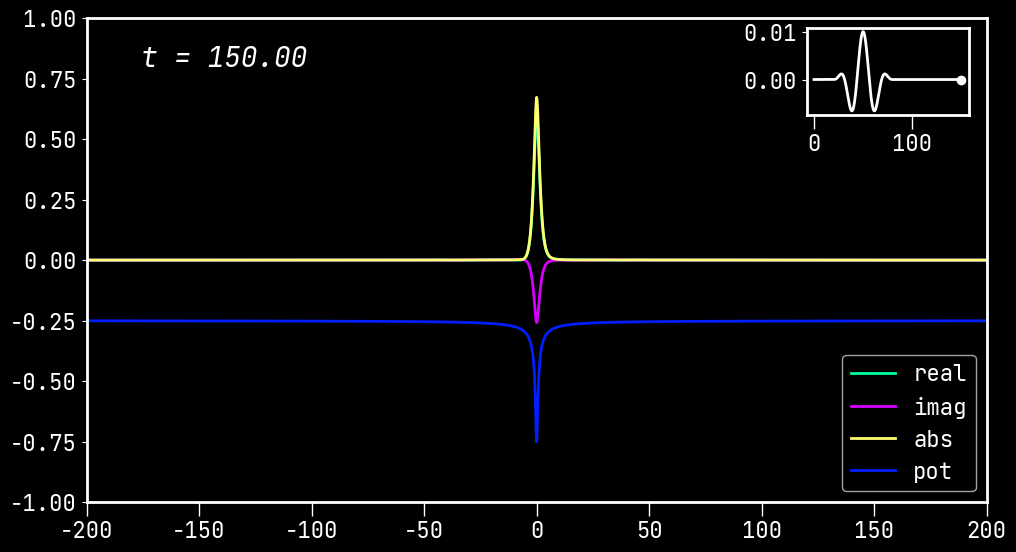

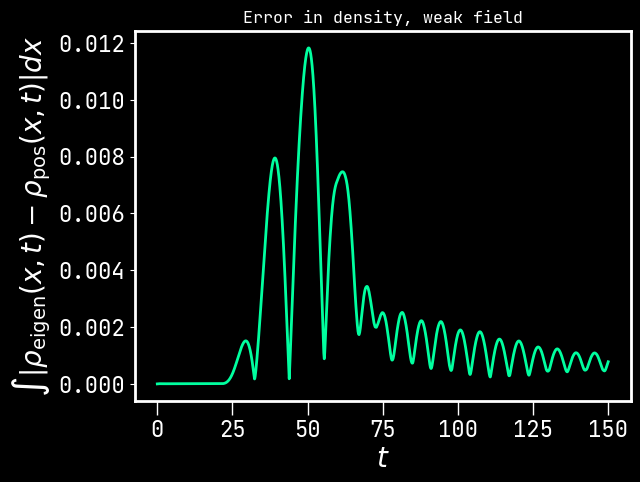

In [7]:
# make a plot and save to file
%matplotlib inline
plt.figure()
plt.plot(sim0.t_grid, dens_diff)
plt.xlabel('$t$')
plt.ylabel('$\int |\\rho_{\\rm eigen}(x,t) - \\rho_{\\rm pos}(x,t)| dx$')
plt.title('Error in density, ' + case + ' field')
plt.savefig(f'atom_1d_density_error_{case}.pdf', bbox_inches='tight')
plt.show()


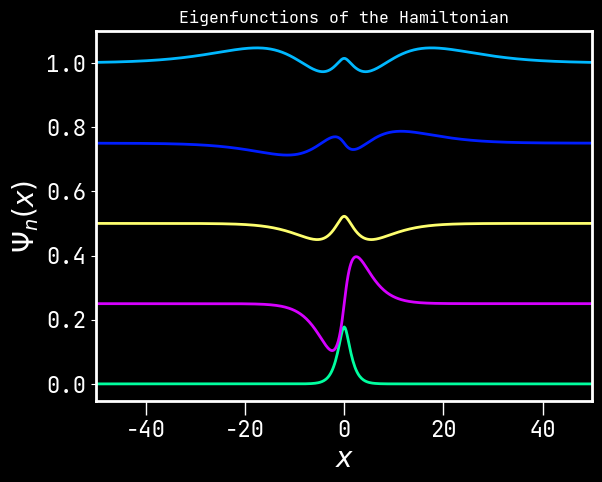

In [8]:

#
# plot eigenfunctions
#
plt.figure()
psi0 = sim.U_mat.copy()
for i in range(0,psi0.shape[1],2):
    psi0[:,i] /= np.sign(sim.U_mat[nx//2, i]) # make sure the wavefunction is positive at the center
for i in range(1,psi0.shape[1]):
    psi0[:,i] += 0.25*i
    
plt.plot(sim.x, psi0.real)
plt.xlim(-50,50)
plt.xlabel('$x$')
plt.ylabel('$\Psi_n(x)$')
plt.title('Eigenfunctions of the Hamiltonian')
plt.savefig('atom_1d_eigenstates.pdf', bbox_inches='tight')
plt.show()


